# 1. 2.2 Simple_ImgProcessing - Carlos pano H (A01066264)

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [2]:
img1 = mpimg.imread('data/img1.jpg')
img2 = mpimg.imread('data/img2.jpg')
img3 = mpimg.imread('data/img3.jpg')

print('Image 1 shape:', img1.shape)
print('Image 2 shape:', img2.shape)
print('Image 3 shape:', img3.shape)


Image 1 shape: (2333, 3500, 3)
Image 2 shape: (2160, 3840, 3)
Image 3 shape: (2339, 3500, 3)


In [3]:
# Preview image 1
# plt.imshow(img1)
# print(type(img1))

In [4]:
# Preview image 2
# plt.imshow(img2)
# print(type(img2))

In [5]:
# Preview image 3
# plt.imshow(img3 )
# print(type(img3))

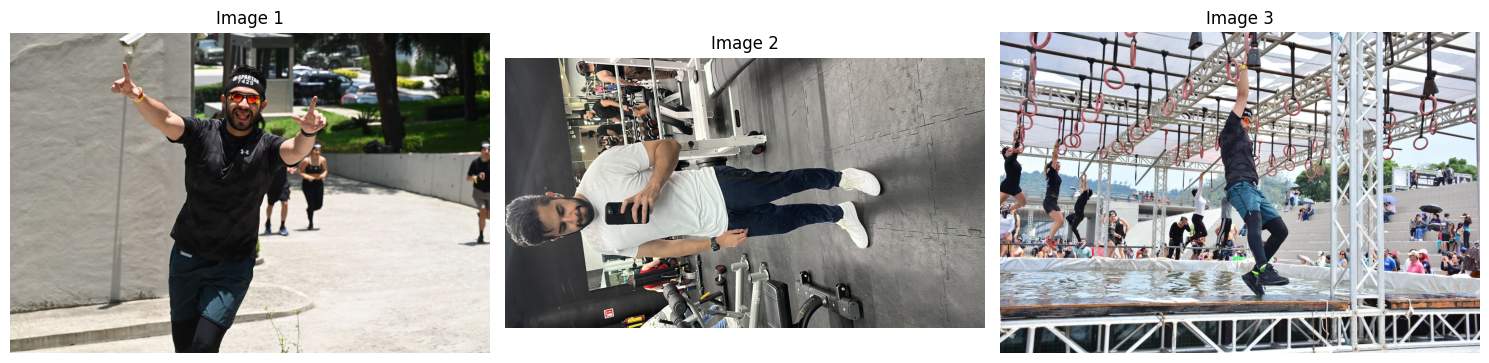

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].set_title('Image 3')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### Exercise 1
Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

#### - Transformación Negativa
La transformación negativa de una imagen es una operación fundamental en el procesamiento de imágenes que invierte los valores de brillo y color de cada píxel. El resultado es una imagen en la que las áreas brillantes se vuelven oscuras y las áreas oscuras se vuelven claras, de forma análoga a la relación entre un negativo fotográfico y una copia positiva. En el ámbito digital, esta transformación se logra con una simple operación matemática. 

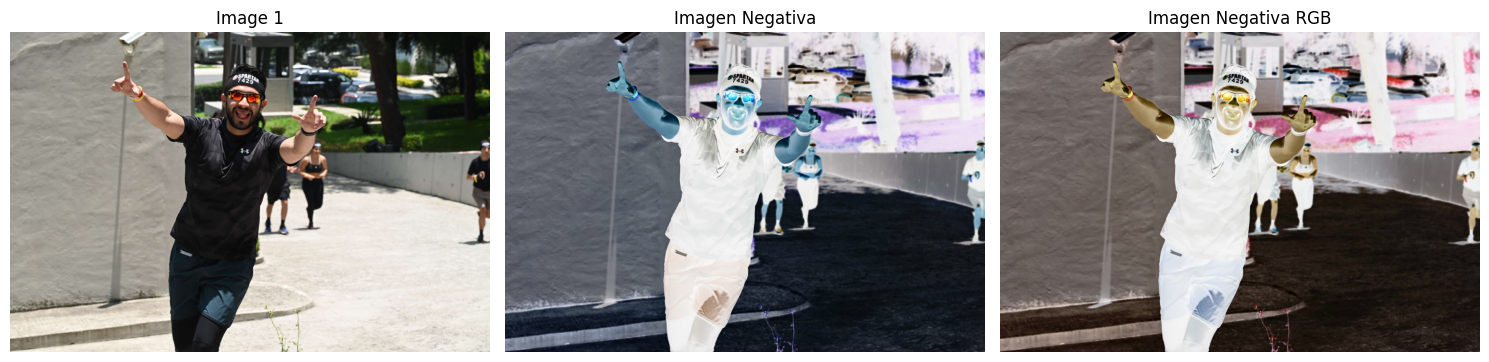

In [7]:
# Aplicar la transformación negativa utilizando cv2.bitwise_not()
img_negativa = cv2.bitwise_not(img1)
img_negativa_rgb = cv2.cvtColor(img_negativa, cv2.COLOR_BGR2RGB)

# Display all three images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(img_negativa)
axes[1].set_title('Imagen Negativa')
axes[1].axis('off')

axes[2].imshow(img_negativa_rgb)
axes[2].set_title('Imagen Negativa RGB')
axes[2].axis('off')

plt.tight_layout()
plt.show()

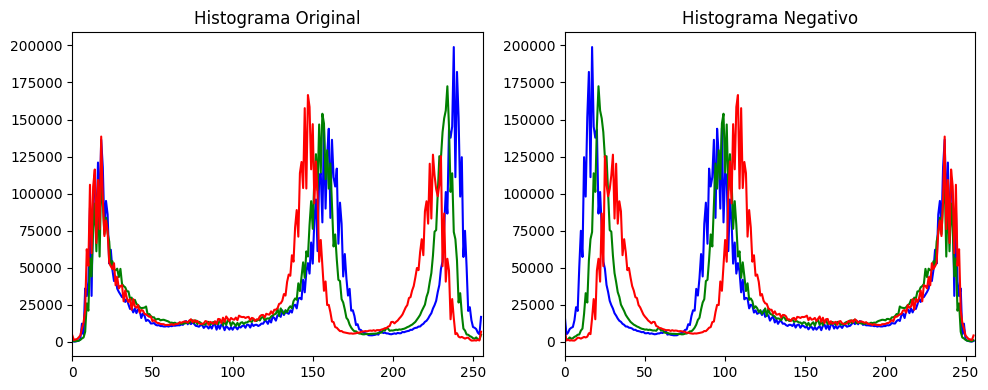

In [8]:
plt.figure(figsize=(10, 4))

# Histograma de la imagen original
plt.subplot(1, 2, 1)
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0, 256])
plt.title('Histograma Original')

# Histograma de la imagen negativa
plt.subplot(1, 2, 2)
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img_negativa],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0, 256])
plt.title('Histograma Negativo')

plt.tight_layout()
plt.show()

#### - Sustracción de Imágenes
La sustracción de imágenes es una técnica utilizada para identificar las diferencias entre dos imágenes. Es una operación pixel a pixel en la que el valor de un píxel en la primera imagen se resta del valor del píxel correspondiente en la segunda. El resultado es una nueva imagen que destaca las variaciones entre ambas. En la imagen resultante, los píxeles con valores cercanos a cero indican que no hubo cambio entre las dos imágenes, mientras que los valores altos (tanto positivos como negativos) señalan una diferencia significativa.

In [9]:
imgV1 = mpimg.imread('data/data-substraction-sample/img-1.jpg')
imgV2 = mpimg.imread('data/data-substraction-sample/img-2.jpg')

# Asegurarse de que las imágenes tengan la misma forma para la resta
if imgV1.shape!= imgV2.shape:
    # Redimensionar la segunda imagen para que coincida con la primera
    imgV2_resized = cv2.resize(imgV2, (imgV1.shape[1], imgV1.shape))
else:
    imgV2_resized = imgV2

# Realizar la sustracción de imágenes
diff = cv2.absdiff(imgV1, imgV2_resized)

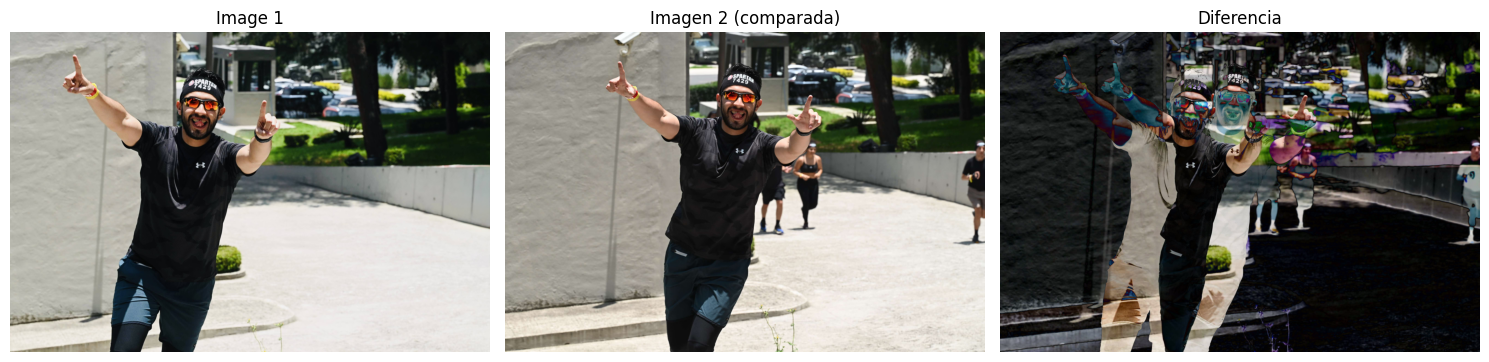

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(imgV1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(imgV2_resized)
axes[1].set_title('Imagen 2 (comparada)')
axes[1].axis('off')

axes[2].imshow(diff)
axes[2].set_title('Diferencia')
axes[2].axis('off')

plt.tight_layout()
plt.show()

#### - Corrección Gamma
La corrección gamma es una operación no lineal que ajusta el brillo y el contraste de una imagen al modificar los valores de luminancia de los píxeles.[12, 13] Su propósito fundamental es compensar la diferencia entre la respuesta lineal de los sensores de las cámaras y la percepción no lineal del brillo por parte del ojo humano. Los sensores de las cámaras capturan la luz de manera lineal (si la cantidad de luz se duplica, la señal del sensor también se duplica), mientras que los ojos humanos son más sensibles a los cambios en los tonos oscuros que en los tonos claros.

| Valor Original de Píxel (I) | Píxel con Gamma 0.5 (Aclarar) | Píxel con Gamma 1.0 (Sin Cambio) | Píxel con Gamma 2.2 (Oscurecer) |
|---|---|---|---|
| 0 | 0 | 0 | 0 |
| 64 | 128 | 64 | 16 |
| 128 | 180 | 128 | 60 |
| 192 | 222 | 192 | 134 |
| 255 | 255 | 255 | 255 |

In [11]:
# Función para aplicar corrección gamma
def apply_gamma_correction(image, gamma):
    # Crear la tabla de búsqueda (LUT)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
    
# Aplicar corrección gamma con diferentes valores
img_gamma_1_0 = apply_gamma_correction(img2, 1.00) # Sin cambio
img_gamma_2_2 = apply_gamma_correction(img2, 2.2) # Oscurece la imagen
img_gamma_0_5 = apply_gamma_correction(img2, 0.5) # Aclara la imagen

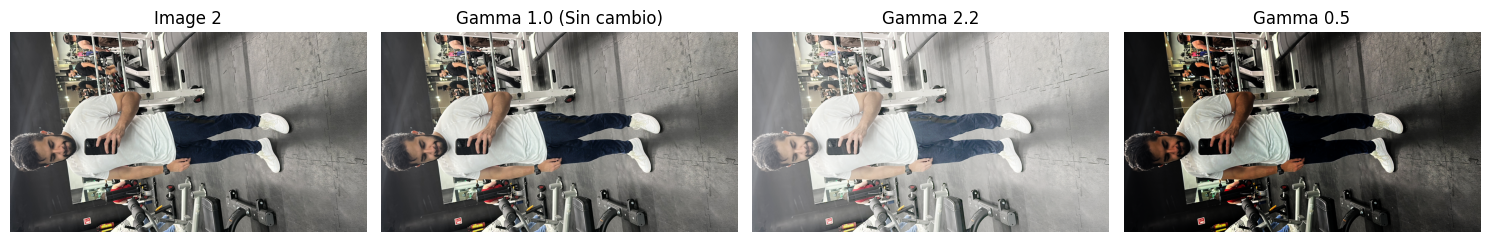

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(img2)
axes[0].set_title('Image 2')
axes[0].axis('off')

axes[1].imshow(img_gamma_1_0)
axes[1].set_title('Gamma 1.0 (Sin cambio)')
axes[1].axis('off')

axes[2].imshow(img_gamma_2_2)
axes[2].set_title('Gamma 2.2')
axes[2].axis('off')

axes[3].imshow(img_gamma_0_5)
axes[3].set_title('Gamma 0.5')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### Exercise 2
Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.


----

#### Detección de fraude en tarjetas de crédito y billetes falsos
La inversión de la imagen puede hacer visibles **anomalías** en los hologramas o en el número de la tarjeta, que podrían indicar manipulación o permite a las máquinas detectar características de seguridad como hilos de seguridad o marcas de agua que se vuelven más claras al invertir la imagen.

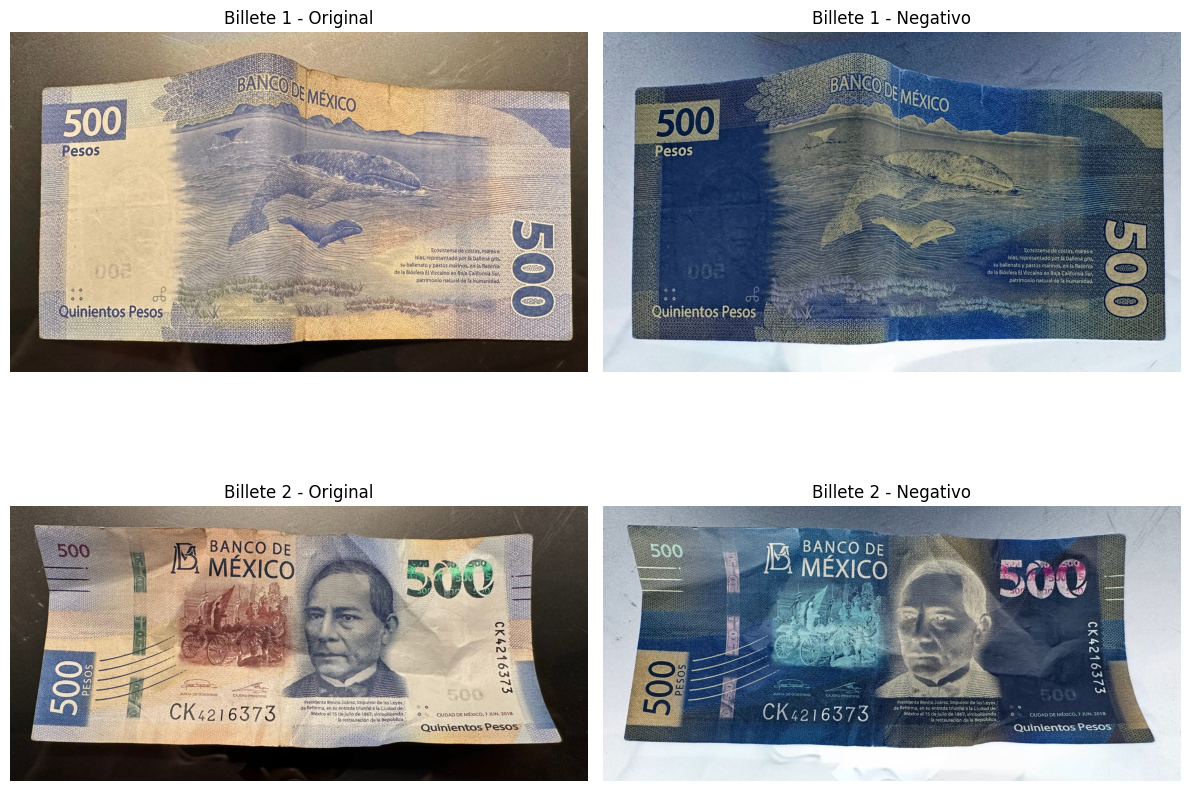

In [13]:
billete1 = mpimg.imread('data/billete-original/img1.jpg')
billete2 = mpimg.imread('data/billete-original/img2.jpg')

img_negativa_billete1 = cv2.bitwise_not(billete1)
img_negativa_billete2 = cv2.bitwise_not(billete2)

# Mostrar en una grilla 2x2: original y negativo de cada billete
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(billete1)
axes[0, 0].set_title('Billete 1 - Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_negativa_billete1)
axes[0, 1].set_title('Billete 1 - Negativo')
axes[0, 1].axis('off')

axes[1, 0].imshow(billete2)
axes[1, 0].set_title('Billete 2 - Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_negativa_billete2)
axes[1, 1].set_title('Billete 2 - Negativo')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

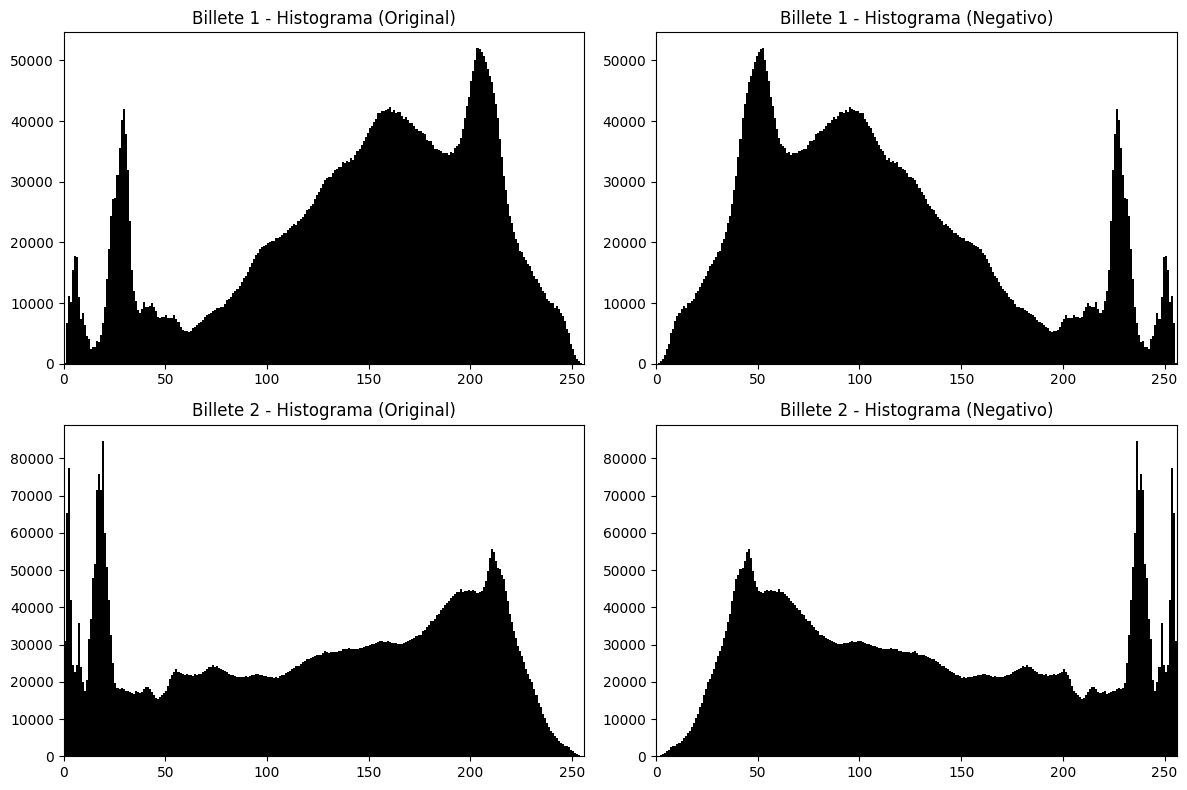

In [14]:
# Histograma en escala de grises para cada billete y su negativo

def plot_gray_hist(ax, image, title):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ax.hist(gray.ravel(), bins=256, range=(0,256), color='black')
    ax.set_title(title)
    ax.set_xlim(0,256)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_gray_hist(axes[0, 0], billete1, 'Billete 1 - Histograma (Original)')
plot_gray_hist(axes[0, 1], img_negativa_billete1, 'Billete 1 - Histograma (Negativo)')
plot_gray_hist(axes[1, 0], billete2, 'Billete 2 - Histograma (Original)')
plot_gray_hist(axes[1, 1], img_negativa_billete2, 'Billete 2 - Histograma (Negativo)')

plt.tight_layout()
plt.show()


### Justificación y Demostración
El uso de la inversión de imagen para el análisis de billetes falsos se justifica por cómo esta técnica resalta las características de seguridad que son difíciles de ver a simple vista. Los billetes auténticos contienen marcas de agua, hilos de seguridad y microimpresiones que están diseñadas para ser sutiles y difíciles de replicar por los falsificadores.

Al invertir los colores de la imagen, estos elementos de seguridad se vuelven mucho más evidentes. Por ejemplo, una marca de agua, que es un área más delgada del papel que aparece clara cuando se ve a contraluz, se mostrará como una forma oscura en la imagen invertida. De manera similar, un hilo de seguridad o una banda que es casi invisible en el billete normal, a menudo aparece como una línea de alto contraste en el negativo. Este contraste mejorado facilita a los sistemas de visión por computadora y a las máquinas detectoras la identificación y validación de estas características, permitiendo una verificación rápida y precisa de la autenticidad del billete.

### Exercise 3
Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.


----

#### Astronomía
En las imágenes de telescopios, la corrección de gamma se utiliza para resaltar los detalles de objetos celestes de baja luminosidad, como nebulosas o galaxias distantes, haciéndolos visibles en la imagen.

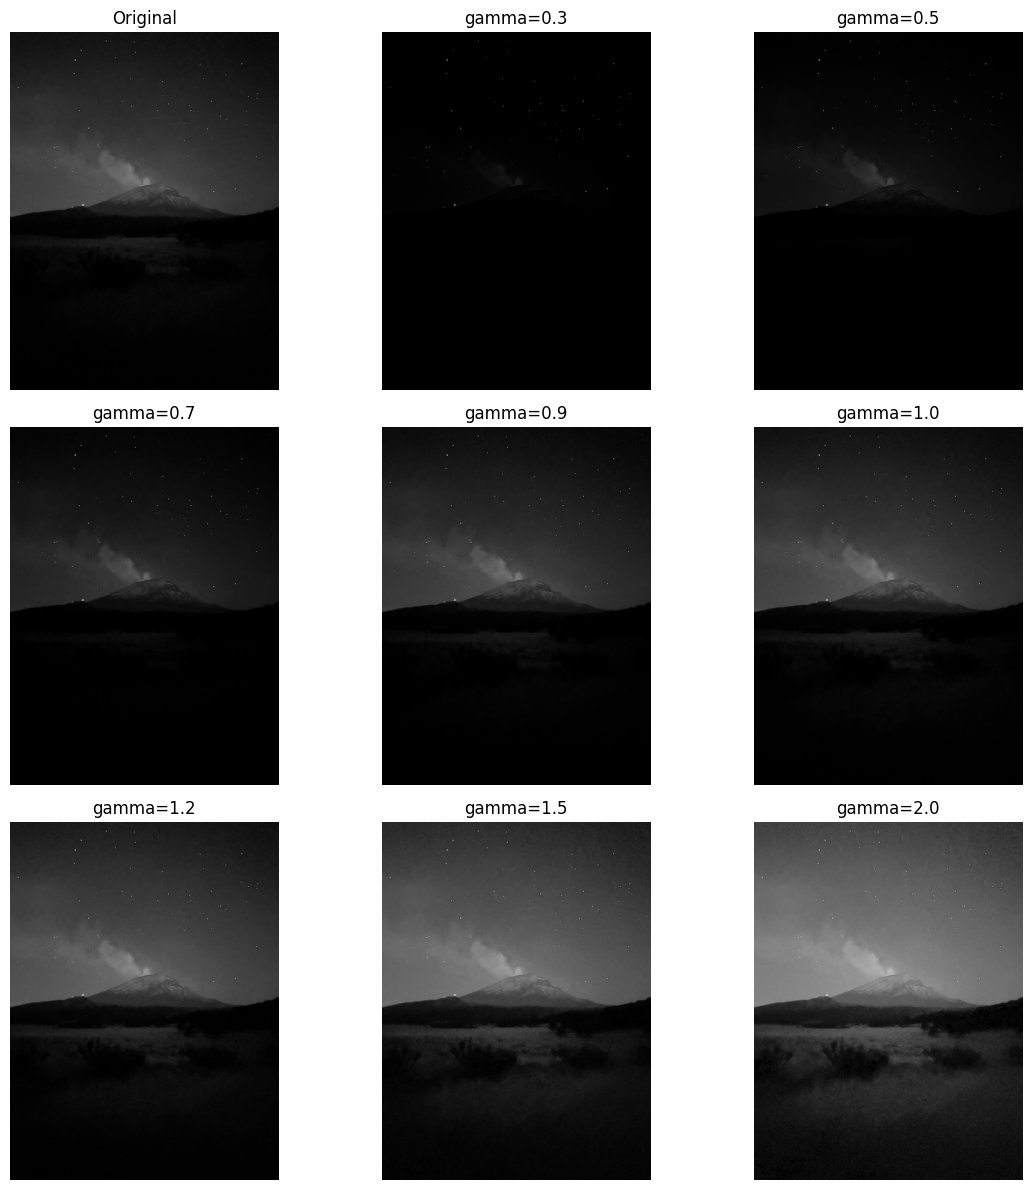

In [15]:
# Comparar múltiples valores de gamma para resaltar estrellas en cielo nocturno
# gamma < 1 aclara sombras; gamma > 1 oscurece y puede reducir ruido de fondo

imgPopo = cv2.imread('data/ascensoPopo/img1.jpg', cv2.IMREAD_GRAYSCALE)

def apply_gamma(image_gray, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image_gray, table)

# Lista de gammas para probar (ajusta según resultados)
gammas = [0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 2.0]
results = [(g, apply_gamma(imgPopo, g)) for g in gammas]

# Mostrar original + correcciones en una grilla 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Posición 0: Original
axes[0].imshow(imgPopo, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Resto: distintas gammas
for ax, (g, img_c) in zip(axes[1:], results):
    ax.imshow(img_c, cmap='gray')
    ax.set_title(f'gamma={g}')
    ax.axis('off')

# Ocultar ejes sobrantes si los hay
for k in range(1 + len(results), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()



### Justificación y Demostración
La justificación para usar la corrección de gamma en la astronomía se basa en la forma en que los píxeles de una cámara CCD astronómica capturan la luz. En imágenes de larga exposición, los objetos tenues como las nebulosas y galaxias tienen valores de píxeles muy bajos en comparación con las estrellas más brillantes. Al aplicar una corrección de gamma con un valor superior a 1.0, se aumenta el brillo de los píxeles con valores bajos de manera más pronunciada que los valores altos. Esto hace que las estructuras más tenues sean más visibles sin saturar las estrellas.

La demostración permite subir una imagen de una nebulosa o galaxia. Una vez subida, el código procesará la imagen para aplicar la corrección. La comparación visual de la imagen original y la corregida ilustrará cómo los detalles casi invisibles en la oscuridad del espacio se vuelven mucho más claros y definidos.

### Exercise 3
Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.


----

#### Detección de fraude en tarjetas de crédito y billetes falsos
La inversión de la imagen puede hacer visibles **anomalías** en los hologramas o en el número de la tarjeta, que podrían indicar manipulación o permite a las máquinas detectar características de seguridad como hilos de seguridad o marcas de agua que se vuelven más claras al invertir la imagen.